Convergence of the secant method.
==================

In this section of Lecture 24, we'll see the convergence rate of the secant method for finding the root of a scalar nonlinear function $f$.

Let $f : \mathbb{R} \to \mathbb{R}$, we want to find $\alpha$ such that $f(\alpha) = 0$. 

Recall that the secant method begins with two iterates: $x_0, x_1$ and proceeds by finding the interpolanting line and moving to the root of that line. The interpolanting line in Newton form is $p(x) = f(x_0) + \frac{f(x_k) - f(x_{k-1})}{x_{k} - x_{k-1}} (x - x_k)$. Solving for the update yields 

$$ x_{k+1} = x_{k} - \frac{x_{k} - x_{k-1}}{f(x_k) - f(x_{k-1})} f(x_k) $$

We can visualize this method. 

In [36]:
using Plots

┌ Info: Saved animation to 
│   fn = C:\Users\saila\Downloads\julia\tmp.gif
└ @ Plots C:\Users\saila\.julia\packages\Plots\lmp2A\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\saila\\Downloads\\julia\\tmp.gif")
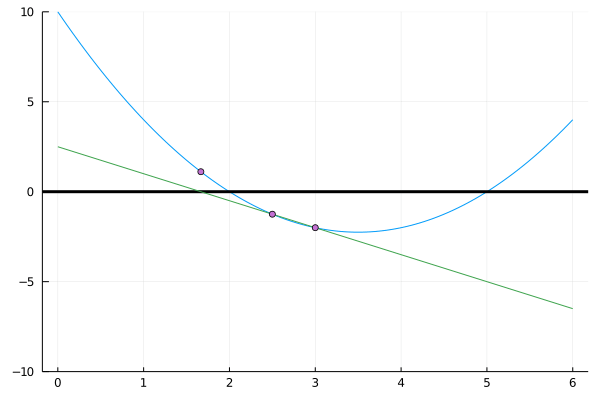

In [48]:
Fun = x -> (x .- 5.).*(x .- 2.)
xprev = 2.5
x = 3.
xx = collect(range(0,stop=6,length=500))
nsteps = 5
xhist = zeros(nsteps+2)
xhist[1] = xprev
xhist[2] = x
anim = @animate for i=3:nsteps+2
    xnext = x - ((x-xprev)/(Fun(x)-Fun(xprev)))*Fun(x)
    Line = z-> Fun(x) .+ ((Fun(x) - Fun(xprev))./(x-xprev)).*(z .- x)
    plot(xx,Fun(xx),leg=false)
    hline!([0.],linewidth=3.,linecolor=colorant"black")
    plot!(xx,Line(xx))
    
    # Arg, Julia anonymous functions don't capture the current values.
    xprev,x = x,xnext 
    xhist[i] = x

    scatter!(xhist[1:i],Fun(xhist[1:i]))
    ylims!(-10,10)

end 
gif(anim,fps=1)

To study the convergence, we make use of a few ideas that use divided differences. Let $\alpha$ be the limit point of the sequence $x_k$. Then note that 

$$x_{k+1} - \alpha = (x_{k} - \alpha)(x_{k-1} - \alpha) \frac{f[x_{k-1},x_k,\alpha]}{f[x_{k-1},x_k]} $$

(This is not easy to work out, but the book works through it.

Then as $x_k \to \alpha$, note that $\frac{f[x_{k-1},x_k,\alpha]}{f[x_{k-1},x_k]} \to 1/2 f''(\alpha) / f'(\alpha)$. So what happens is that 

$$\lim_{k \to \infty} \frac{x_{k+1} - \alpha}{x_k - \alpha} = (x_{k-1} - \alpha) \frac{f[x_{k-1},x_k,\alpha]}{f[x_{k-1},x_k]} \to 0$$

this means that the method converges superlinearly. Let's see a plot of it's error. 



xhist = [2.5, 3.0, 1.6666666666666667, 2.142857142857143, 2.014925373134328, 1.9992498124531133, 2.0000037499953125, 2.0000000009375]


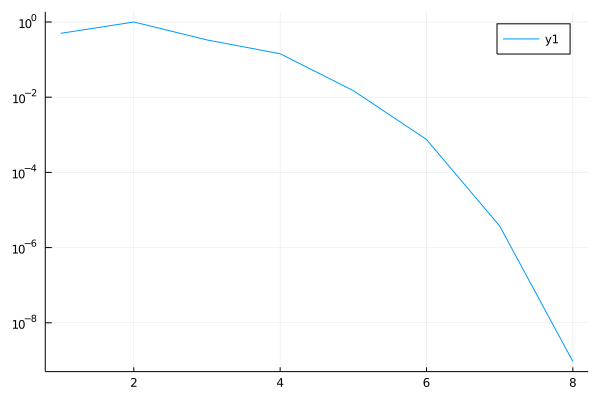

In [50]:
Fun = x -> (x .- 5.).*(x .- 2.)
xprev = 2.5
x = 3.
Fun(5.)
xx = collect(range(0,stop=6,length=500))
nsteps = 6  
xhist = zeros(nsteps+2)
xhist[1] = xprev
xhist[2] = x
anim = @animate for i=3:nsteps+2
    xnext = x - ((x-xprev)/(Fun(x)-Fun(xprev)))*Fun(x)
    # Arg, Julia anonymous functions don't capture the current values.
    xprev,x = x,xnext 
    xhist[i] = x
end 
@show xhist
plot(1:length(xhist),abs.(xhist.-2.),yaxis=:log)

Our theory predicts trouble with roots whose derivative is zero. We see this too.


┌ Info: Saved animation to 
│   fn = C:\Users\saila\Downloads\julia\tmp.gif
└ @ Plots C:\Users\saila\.julia\packages\Plots\lmp2A\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\saila\\Downloads\\julia\\tmp.gif")
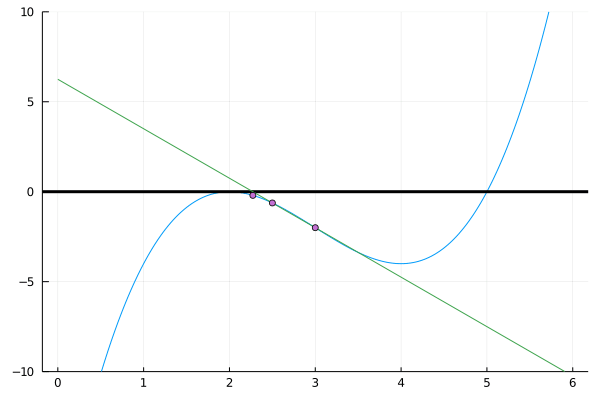

In [53]:
Fun = x -> (x .- 5.).*(x .- 2.).*(x .- 2.)
xprev = 2.5
x = 3.
Fun(5.)
xx = collect(range(0,stop=6,length=500))
nsteps = 15
xhist = zeros(nsteps+2)
xhist[1] = xprev
xhist[2] = x
anim = @animate for i=3:nsteps+2
    xnext = x - ((x-xprev)/(Fun(x)-Fun(xprev)))*Fun(x)
    Line = z-> Fun(x) .+ ((Fun(x) - Fun(xprev))./(x-xprev)).*(z .- x)
    plot(xx,Fun(xx),leg=false)
    hline!([0.],linewidth=3.,linecolor=colorant"black")
    plot!(xx,Line(xx))
    
    # Arg, Julia anonymous functions don't capture the current values.
    xprev,x = x,xnext 
    xhist[i] = x

    scatter!(xhist[1:i],Fun(xhist[1:i]))
    ylims!(-10,10)

end 
gif(anim,fps=1)

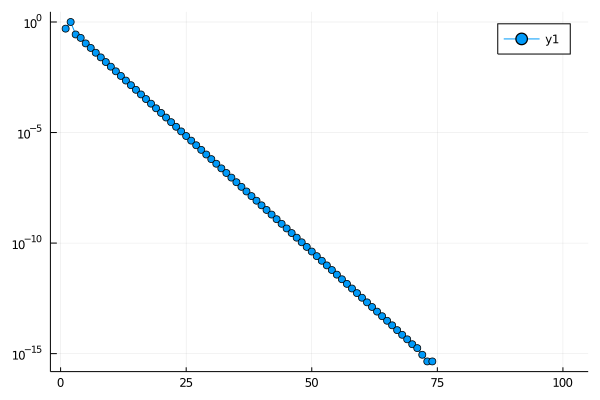

In [57]:
Fun = x -> (x .- 5.).*(x .- 2.).*(x .- 2.)
xprev = 2.5
x = 3.
Fun(5.)
xx = collect(range(0,stop=6,length=500))
nsteps = 100
xhist = zeros(nsteps+2)
xhist[1] = xprev
xhist[2] = x
anim = @animate for i=3:nsteps+2
    xnext = x - ((x-xprev)/(Fun(x)-Fun(xprev)))*Fun(x)
    # Arg, Julia anonymous functions don't capture the current values.
    xprev,x = x,xnext 
    xhist[i] = x
end 
plot(abs.(xhist .- 2.),marker=:circle)
yaxis!(:log10)

Here, we see linear convergence, instead of the super-linear convergence.

In this case that the derivative is not zero, the actual rate of convergence is based on the Golden Ratio. There is a neat proof of this that proceeds by setting: 
$$e_k = x_k -\alpha$$
and then noting that, in the limit, 
$$ e_{k+1} = e_{k} e_{k-1} C $$
for some constant $C$ that is given by the ratio of determinants. To see why the Golden Ratio arises, note that 
$$ C e_{k+1} = C e_k C e_{k-1}$$ 
and so if $E_k = C e_k$, then 
$$ E_{k+1} = E_k E_{k-1}. $$

We are almost there, the final step is to take logs, in which case
$$ \log E_{k+1} = \log E_{k} + \log E_{k-1} $$
and we see the Fibonacci-like series emerge. 



The previous arguments are not quite rigorous. Gautschi has a fully rigorous proof that includes a notion of local convergence in Theorem 4.5.1. I encourage you to read this proof, but we won't try and cover it.
(But I think there might be a nice Julia demo using ApproxFun that could illustrate various pieces of the theorem.) 